## Grid com fontes equivalentes de média de bloco

In [2]:
import matplotlib.pyplot as plt
import pyproj
import verde as vd
import pandas as pd
import harmonica as hm

In [23]:
data = pd.read_csv('Dados1134.csv')

In [5]:
data

,Unnamed: 0,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,MAGBASE,MAGBRU,MAGCOM,MAGCOR,MAGNIV,MAGMIC,MAGIGRF,IGRF,LONGITUDE,LATITUDE,DATA,HORA
0,2941965,654627,9093323,2924.0,400.34,404.45,106.76,293.58,24220.106,24671.908,24667.127,24650.229,24629.175,24627.655,17.102,24610.553,-55.596285,-8.199987,2015/08/21,18:01:55.0
1,2941966,654627,9093330,2924.1,400.14,404.27,105.39,294.75,24220.105,24672.277,24667.502,24650.685,24629.628,24628.085,17.516,24610.569,-55.596285,-8.199923,2015/08/21,18:01:55.1
2,2941967,654627,9093337,2924.2,399.94,404.09,103.51,296.43,24220.103,24672.677,24667.906,24651.161,24630.103,24628.535,17.951,24610.584,-55.596285,-8.199859,2015/08/21,18:01:55.2
3,2941968,654627,9093344,2924.3,399.74,403.91,104.04,295.70,24220.102,24673.106,24668.336,24651.654,24630.596,24629.003,18.403,24610.600,-55.596285,-8.199796,2015/08/21,18:01:55.3
4,2941969,654627,9093351,2924.4,399.54,403.74,105.29,294.25,24220.101,24673.559,24668.789,24652.160,24631.100,24629.483,18.868,24610.615,-55.596284,-8.199732,2015/08/21,18:01:55.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66503,3443650,665161,9115371,3503.9,409.10,413.42,108.28,300.82,24192.445,24746.675,24741.713,24751.619,24737.740,24734.758,76.183,24658.575,-55.501419,-8.000278,2015/08/28,18:01:53.9
66504,3443651,665161,9115378,3504.0,409.13,413.33,106.78,302.35,24192.444,24746.811,24741.855,24751.693,24737.814,24734.839,76.248,24658.591,-55.501417,-8.000213,2015/08/28,18:01:54.0
66505,3443652,665161,9115385,3504.1,409.05,413.33,106.77,302.28,24192.442,24746.923,24741.972,24751.752,24737.874,24734.910,76.303,24658.607,-55.501415,-8.000149,2015/08/28,18:01:54.1
66506,3443653,665161,9115392,3504.2,408.97,413.33,106.00,302.97,24192.441,24747.011,24742.064,24751.805,24737.927,24734.974,76.352,24658.623,-55.501413,-8.000084,2015/08/28,18:01:54.2


In [ ]:
# vou adicionar uma coluna com anomalia total do campo

In [46]:
# Coordenadas dos levantamentos
long_all = data.LONGITUDE
lat_all = data.LATITUDE
# Anomalia de Campo Total
act_all = data.MAGIGRF

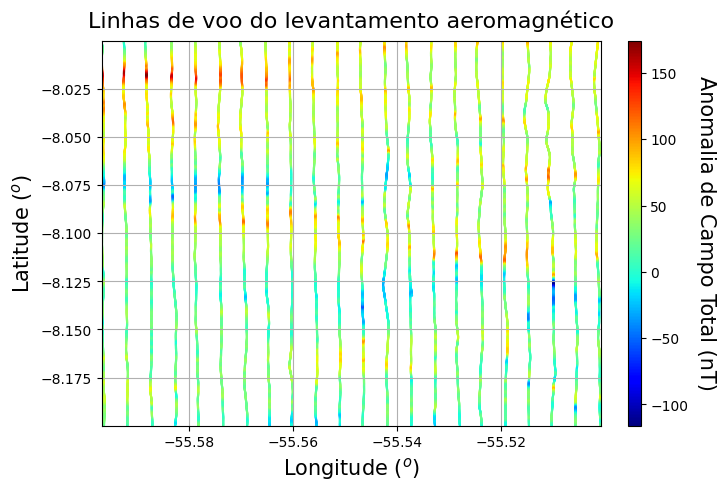

In [47]:
figure1 = plt.figure(figsize=(7,5))

p1 = plt.scatter(long_all, lat_all, s = 1., c = act_all, marker = '.', cmap = plt.cm.jet)
cbar1 = plt.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Anomalia de Campo Total (nT)',fontsize = 15, rotation = -90, labelpad = 20)

plt.title('Linhas de voo do levantamento aeromagnético',fontsize = 16, pad = 10)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
plt.xlim(long_all.min(), long_all.max())
plt.ylim(lat_all.min(), lat_all.max())

# plt.savefig('figure01-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
# plt.savefig('figure01-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
plt.grid()
plt.show()

# Slice a smaller portion of the survey data to speed-up calculations for this example

In [33]:
#region = [-55.58, -55.56, -8.175, -8.1]
#inside = vd.inside((data.LONGITUDE, data.LATITUDE), region)
#data = data[inside]
#print("Number of data points:", data.shape[0])
#print("Mean height of observations:", data.ALTURA.mean())

# Since this is a small area, we'll project our data and use Cartesian coordinates

In [48]:
projection = pyproj.Proj(proj="merc", lat_ts=data.LATITUDE.mean())
easting, northing = projection(data.LONGITUDE.values, data.LATITUDE.values)
coordinates = (easting, northing, data.ALTURA)

# Create the equivalent sources.
# We'll use block-averaged sources at a constant depth beneath the observation
# points. We will interpolate on a grid with a resolution of 500m, so we will
# use blocks of the same size. The damping parameter helps smooth the predicted
# data and ensure stability.

In [71]:
eqs = hm.EquivalentSources(depth=100, damping=1, block_size=500, depth_type="constant")

In [72]:
# Fit the sources coefficients to the observed magnetic anomaly.
eqs.fit(coordinates, data.MAGIGRF)

EquivalentSources(block_size=500, damping=1, depth=100, depth_type='constant')

# Evaluate the data fit by calculating an R² score against the observed data.
# This is a measure of how well the sources fit the data, NOT how good the interpolation will be.

In [73]:
print("R² score:", eqs.score(coordinates, data.MAGIGRF))

C:\Users\wende\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\verde\base\base_classes.py:359: FutureWarning: The default scoring will change from R² to negative root mean squared error (RMSE) in Verde 2.0.0. This may change model selection results slightly.
  warnings.warn(


R² score: 0.9224415404857469


# Interpolate data on a regular grid with 500 m spacing. The interpolation
# requires the height of the grid points (upward coordinate). By passing in 1500 m, we're effectively upward-continuing the data (mean flight height is 500 m).

In [86]:
region = vd.get_region(coordinates)  # get the region boundaries
grid_coords = vd.grid_coordinates(region=region, spacing=100, extra_coords=200)
grid = eqs.grid(coordinates=grid_coords, data_names=["magnetic_anomaly"])

# The grid is a xarray.Dataset with values, coordinates, and metadata

In [87]:

print("\nGenerated grid:\n", grid)


Generated grid:
 <xarray.Dataset>
Dimensions:           (northing: 222, easting: 107)
Coordinates:
  * easting           (easting) float64 -6.128e+06 -6.128e+06 ... -6.117e+06
  * northing          (northing) float64 -9.008e+05 -9.007e+05 ... -8.787e+05
    upward            (northing, easting) float64 200.0 200.0 ... 200.0 200.0
Data variables:
    magnetic_anomaly  (northing, easting) float64 22.3 21.88 ... 59.34 57.8
Attributes:
    metadata:  Generated by EquivalentSources(block_size=500, damping=1, dept...


# Plot original magnetic anomaly and the gridded and upward-continued version

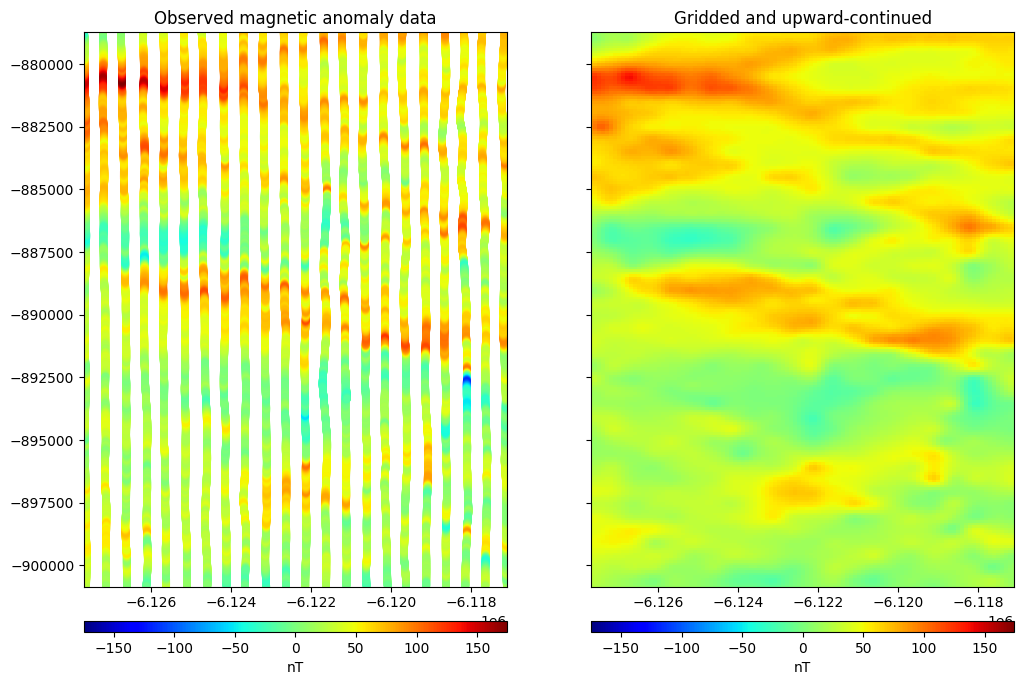

In [88]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 9), sharey=True)

# Get the maximum absolute value between the original and gridded data so we
# can use the same color scale for both plots and have 0 centered at the white
# color.
maxabs = vd.maxabs(data.MAGIGRF, grid.magnetic_anomaly.values)
ax1.set_title("Observed magnetic anomaly data")
tmp = ax1.scatter(
    easting,
    northing,
    c= data.MAGIGRF,
    s=20,
    vmin=-maxabs,
    vmax=maxabs,
    cmap="jet",
)

plt.colorbar(tmp, ax=ax1, label="nT", pad=0.05, aspect=40, orientation="horizontal")
ax1.set_xlim(easting.min(), easting.max())
ax1.set_ylim(northing.min(), northing.max())

ax2.set_title("Gridded and upward-continued")
tmp = grid.magnetic_anomaly.plot.pcolormesh(
    ax=ax2,
    add_colorbar=False,
    add_labels=False,
    vmin=-maxabs,
    vmax=maxabs,
    cmap="jet",
)
plt.colorbar(tmp, ax=ax2, label="nT", pad=0.05, aspect=40, orientation="horizontal")
ax2.set_xlim(easting.min(), easting.max())
ax2.set_ylim(northing.min(), northing.max())

plt.show()